In [1]:
import os

In [2]:
path = "../input/leavescolour/Plant_leave_diseases_dataset_with_augmentation/"

In [3]:
labels =os.listdir(path)

In [4]:
d = {}
for x in labels :
    d[x] = len(os.listdir(path+'/'+ x))

In [5]:
len(d)

39

In [6]:
d

{'Corn___Northern_Leaf_Blight': 1000,
 'Tomato___Late_blight': 1909,
 'Tomato___healthy': 1591,
 'Grape___healthy': 1000,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Soybean___healthy': 5090,
 'Squash___Powdery_mildew': 1835,
 'Background_without_leaves': 1143,
 'Potato___healthy': 1000,
 'Tomato___Early_blight': 1000,
 'Tomato___Septoria_leaf_spot': 1771,
 'Corn___healthy': 1162,
 'Strawberry___Leaf_scorch': 1109,
 'Peach___healthy': 1000,
 'Apple___Apple_scab': 1000,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357,
 'Tomato___Bacterial_spot': 2127,
 'Apple___Black_rot': 1000,
 'Blueberry___healthy': 1502,
 'Cherry___Powdery_mildew': 1052,
 'Peach___Bacterial_spot': 2297,
 'Apple___Cedar_apple_rust': 1000,
 'Tomato___Target_Spot': 1404,
 'Pepper,_bell___healthy': 1478,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Potato___Late_blight': 1000,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 1000,
 'Tomato___Tomato_mosaic_virus': 1000,
 'Strawberry___healthy': 1000,
 'C

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
import random
import os
import matplotlib.pyplot as plt


In [8]:

filenames = os.listdir("../input/leavescolour/Plant_leave_diseases_dataset_with_augmentation")


In [ ]:
leaf_files = []
leaf_categories = []

In [9]:

for filename in filenames:
    
    filepath  = "../input/leavescolour/Plant_leave_diseases_dataset_with_augmentation/" + filename
    
    for x in os.listdir(file):
        p = filepath +"/"+ x
        leaf_files.append(p)
        leaf_categories.append(filename)
#         print(filename,p)
    
df = pd.DataFrame({
    'filename': leaf_files,
    'category': leaf_categories
})

In [10]:
df.head()

,filename,category
0,../input/leavescolour/Plant_leave_diseases_dat...,Corn___Northern_Leaf_Blight
1,../input/leavescolour/Plant_leave_diseases_dat...,Corn___Northern_Leaf_Blight
2,../input/leavescolour/Plant_leave_diseases_dat...,Corn___Northern_Leaf_Blight
3,../input/leavescolour/Plant_leave_diseases_dat...,Corn___Northern_Leaf_Blight
4,../input/leavescolour/Plant_leave_diseases_dat...,Corn___Northern_Leaf_Blight


In [11]:
FAST_RUN = False
IMAGE_WIDTH=256
IMAGE_HEIGHT=256

In [12]:
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [13]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback

def cnnblock(layer,filters,filtershape,dr = 0.25,deep = False , pool = True) :
    
    z = Conv2D(filters[0], filtershape, padding='same')(layer)
    z = Conv2D(filters[1], filtershape, padding='same')(z)
    z = Activation('relu')(z)
    if pool :
        z = MaxPooling2D(pool_size=(2, 2))(z)
    if deep :
        z = BatchNormalization()(z)
        z = Dropout(dr)(z)
    
    
    return z

In [14]:
inputs = Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))

model1 = cnnblock(inputs,[64,64],3,pool = True)

model1 = cnnblock(model1,[32,32],3)

model1 = cnnblock(model1,[16,16],3,deep = True)

model1 = Flatten()(model1)

model1 = Dense(1024, activation='relu')(model1)

model1 = Dense(512, activation='relu')(model1)

model1 = Dense(256, activation='relu')(model1)

model1 = Dense(39, activation='softmax')(model1)

model = Model(inputs, model1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      9248  

<AxesSubplot:>

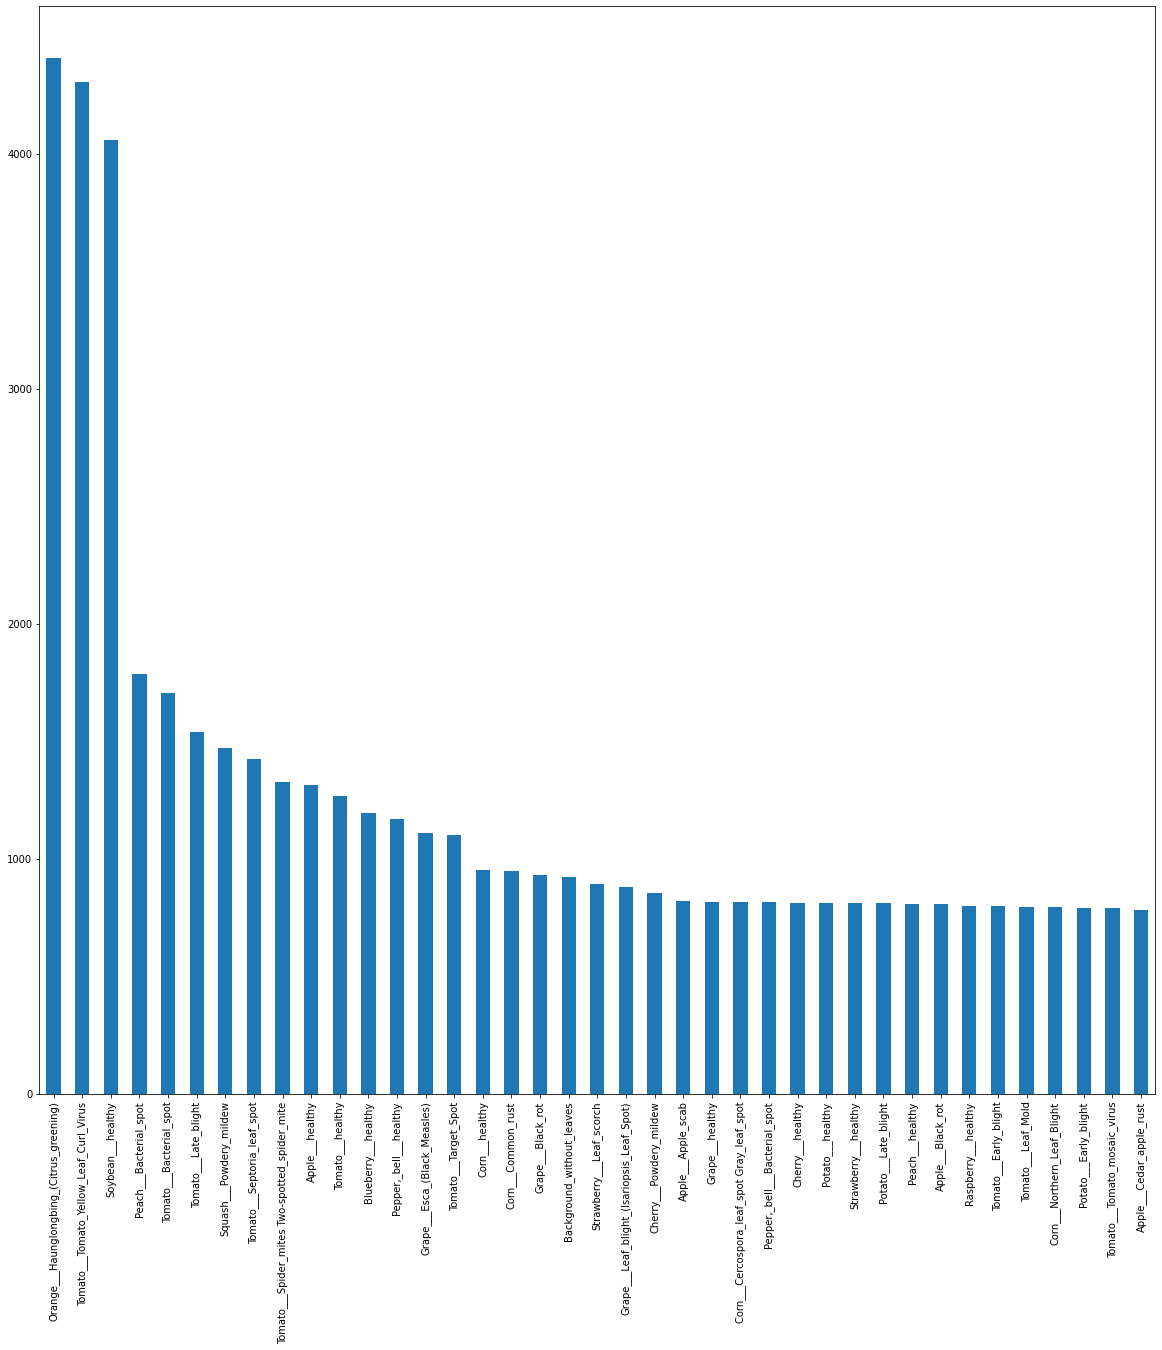

In [16]:
train_z, validate_z = train_test_split(df, test_size=0.20, random_state=42)
train_z= train_z.reset_index(drop=True)
validate_z = validate_z.reset_index(drop=True)
train_z.head()
plt.figure(figsize = (20,20))
train_z['category'].value_counts().plot.bar()

In [17]:
total_train = train_z.shape[0]
total_validation = validate_z.shape[0]
batch_size = 64

In [18]:
t_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

t_generator = t_datagen.flow_from_dataframe(
    train_z, 
     
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 49188 validated image filenames belonging to 39 classes.


In [19]:
v_datagen = ImageDataGenerator(rescale=1/255)

v_generator = v_datagen.flow_from_dataframe(
    validate_z, 
    
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 12298 validated image filenames belonging to 39 classes.


In [20]:
t_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Background_without_leaves': 4,
 'Blueberry___healthy': 5,
 'Cherry___Powdery_mildew': 6,
 'Cherry___healthy': 7,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8,
 'Corn___Common_rust': 9,
 'Corn___Northern_Leaf_Blight': 10,
 'Corn___healthy': 11,
 'Grape___Black_rot': 12,
 'Grape___Esca_(Black_Measles)': 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
 'Grape___healthy': 15,
 'Orange___Haunglongbing_(Citrus_greening)': 16,
 'Peach___Bacterial_spot': 17,
 'Peach___healthy': 18,
 'Pepper,_bell___Bacterial_spot': 19,
 'Pepper,_bell___healthy': 20,
 'Potato___Early_blight': 21,
 'Potato___Late_blight': 22,
 'Potato___healthy': 23,
 'Raspberry___healthy': 24,
 'Soybean___healthy': 25,
 'Squash___Powdery_mildew': 26,
 'Strawberry___Leaf_scorch': 27,
 'Strawberry___healthy': 28,
 'Tomato___Bacterial_spot': 29,
 'Tomato___Early_blight': 30,
 'Tomato___Late_blight': 31,
 'Tomato__

In [21]:
d = t_generator.class_indices


In [22]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
red1 = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
check_point1 = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [23]:
epochs=25
modelhistory = model.fit(
    t_generator, 
    epochs=epochs,
    validation_data=v_generator,
    validation_stps=total_validation//batch_size,
    steps_per_epoch=total_train//batch_size,callbacks=[red1, check_point1])
    


Epoch 1/25
768/768 [==============================] - 1105s 1s/step - loss: 1.7508 - accuracy: 0.5177 - val_loss: 1.8908 - val_accuracy: 0.5434

Epoch 00001: val_loss improved from inf to 1.89082, saving model to model.h5
Epoch 2/25
768/768 [==============================] - 825s 1s/step - loss: 0.7254 - accuracy: 0.7722 - val_loss: 0.8582 - val_accuracy: 0.7636

Epoch 00002: val_loss improved from 1.89082 to 0.85825, saving model to model.h5
Epoch 3/25
768/768 [==============================] - 829s 1s/step - loss: 0.4857 - accuracy: 0.8455 - val_loss: 1.1278 - val_accuracy: 0.7257

Epoch 00003: val_loss did not improve from 0.85825
Epoch 4/25
768/768 [==============================] - 848s 1s/step - loss: 0.3836 - accuracy: 0.8779 - val_loss: 0.5987 - val_accuracy: 0.8289

Epoch 00004: val_loss improved from 0.85825 to 0.59867, saving model to model.h5
Epoch 5/25
768/768 [==============================] - 858s 1s/step - loss: 0.3408 - accuracy: 0.8914 - val_loss: 0.5699 - val_accurac

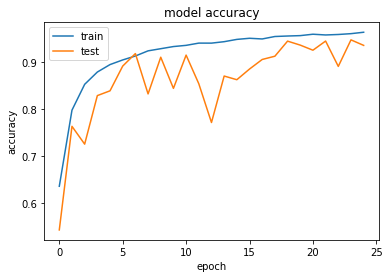

In [24]:
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

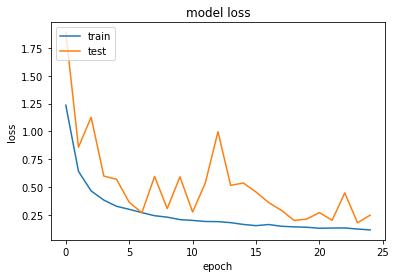

In [25]:
# loss plot
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
model.save_weights("plant(w).h5")
model.save("plant(m).h5")

In [27]:
d = t_generator.class_indices

import cv2
from tqdm import tqdm
from skimage.transform import resize
pred = []
y_true = []
for f in tqdm(range(len(validate_z))) :
#     print(validate["filename"][f])
    x = cv2.imread(validate_z["filename"][f], cv2.IMREAD_COLOR)
    
        
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
#     print(type(x))
#     print(x.shape)
    x = resize(x, IMAGE_SIZE)
#     print(x.shape)
#     print(x)

    x = x.astype(np.float32)
#     print("aaa",x)
#     print(x.shape)
    x = x.reshape((1,256,256,3))

    pred.append(np.argmax(model.predict([x])[0]))
#     print(d[validate["category"][f]])
    y_true.append(d[validate_z["category"][f]])
    

labels = list(t_generator.class_indices.keys())

  0%|          | 0/12298 [00:00<?, ?it/s]


ValueError: cannot reshape array of size 196608 into shape (1,224,224,3)

In [ ]:
labels

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(20,20))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
